WEEK OF OCTOBER 21ST

QUESTION 1

The simple linear regression model analyses the relationship between two variables by fitting the data to a straight line. The formula for simple linear regression is Yi = B0 + B1xi + ϵi. The mean of Yi is the result of B0 + B1xi and ϵ is normally distibuted. Since Yi is the sum of these two, it too is a normal distribution. I will decribe each component:
- Predictor variable (xi): this represents an independant numeric variable
- Outcome variable (Yi): this represents a dependant numeric variable
- Slope component (B1): this represents the slope of striaght line
- Intercept component (B0): this represents the y intercept of the straight line 
- Error term (ϵ): this is a random variable with a distibution and it's the differnce between a data point and the straight line

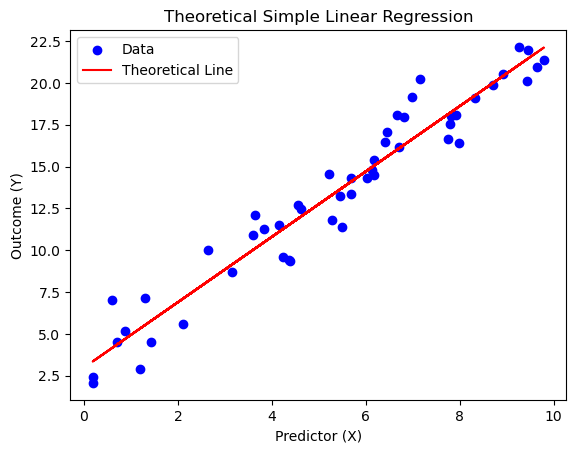

Theoretical Intercept (β0): 3
Theoretical Slope (β1): 2
Estimated Intercept: 2.989184873804586
Estimated Slope: 1.9539099420964283


In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Set seed for reproducibility
np.random.seed(0)

# Parameters
n = 50              # Number of observations
beta0 = 3            # Intercept
beta1 = 2            # Slope
sigma = 1.5          # Standard deviation of the error term

# Generate predictor variable X from a uniform distribution
x = stats.uniform.rvs(loc=0, scale=10, size=n)

# Generate random error terms from a normal distribution
epsilon = stats.norm.rvs(loc=0, scale=sigma, size=n)

# Generate the outcome variable Y based on the linear model
y = beta0 + beta1 * x + epsilon

# Perform simple linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the generated data and the fitted regression line
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, intercept + slope * x, color='red', label='Theoretical Line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Theoretical Simple Linear Regression')
plt.legend()
plt.show()

# Display results
print("Theoretical Intercept (β0):", beta0)
print("Theoretical Slope (β1):", beta1)
print("Estimated Intercept:", intercept)
print("Estimated Slope:", slope)


# Combine into a pandas DataFrame for question 2
df = pd.DataFrame({'x': x, 'y': y})

Chatbot summary: We discussed creating Python code to demonstrate a theoretical simple linear regression model. The code uses arbitrarily set values for parameters, generates predictors from a uniform distribution, and adds normally distributed error terms. The outcome variable is calculated using a linear model, and scipy.stats.linregress is used to fit the model and plot the results.

Chatlog history: https://chatgpt.com/c/672cfa5e-9120-800b-9391-d2964c273ea3

In [ ]:
QUESTION 2

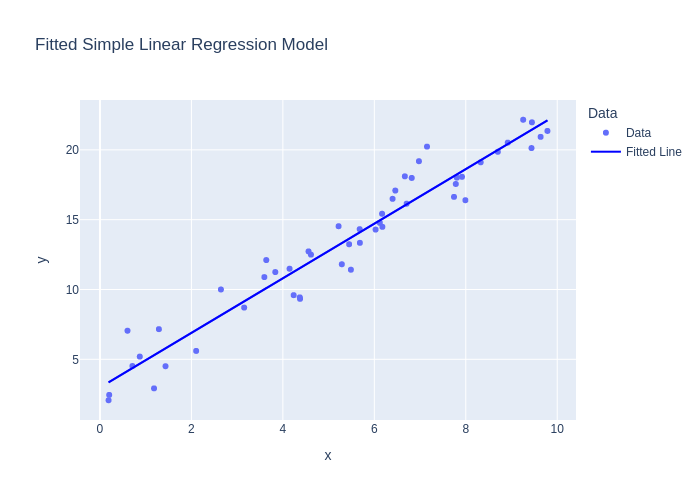

In [52]:
import statsmodels.formula.api as smf  # Library is used for statistics modeling
import plotly.express as px  # this is a ploting library

# These steps specify the regression model and fit the line to the data
model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit()

fitted_model.summary()  # Summary of regression results
fitted_model.summary().tables[1]  # This is the table containing the estimated coefficents
fitted_model.params  # The estimated parameters
fitted_model.params.values  # The numeric estimated parameters
fitted_model.rsquared  # R squared value

# Adds the scatter plot and data onto the figure
df['Data'] = 'Data'
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Fitted Simple Linear Regression Model')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Line")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Chatbot summary: We discussed the statsmodels.formula.api library, focusing on how to use smf.ols for specifying and fitting an OLS linear regression model. We also explored methods for obtaining regression results, such as fitted_model.summary(), fitted_model.params, and fitted_model.rsquared, which provide key statistical information. Lastly, we covered how to add a trendline to a plotly scatter plot and use a trick to label the data in the legend for clarity.

Chatlog history: https://chatgpt.com/c/672d04cd-4dc0-800b-87cf-330681850815

QUESTION 3

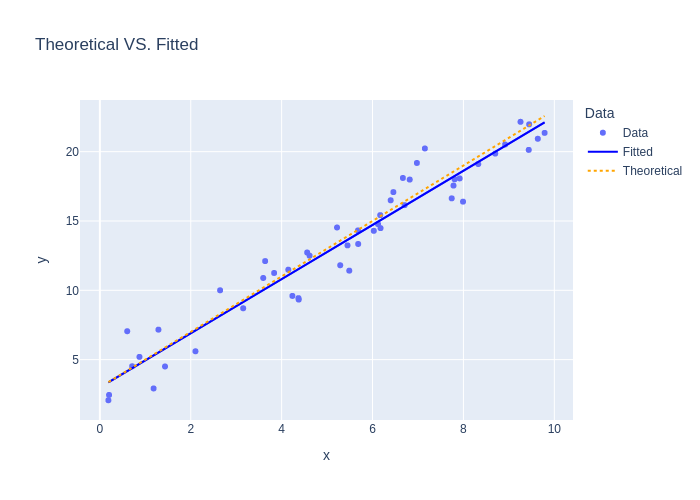

In [54]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Theoretical VS. Fitted')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted")

# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str('Theoretical'), 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

When comparing our original theoretical regression line to our fitted regression line it is clear that they are not the same. Although they are very similar, the slopes of both lines vary from eachtoher. This is due to the simulation of the random sampling variable. For the therotical line we already have the primary parameters of the model. For the fitted line we are estimating the parameters based on the sample of data. Therefore the parameters produce by the fitted model will close, but not exact. Because we are simulating the random sampling varitation, our points of data will have different standard errors causing the lines not to be equal. The greater the sample size, the more similar the two lines will be. 

Chatbot summary: In this session, we discussed how simulation through random sampling variation can cause differences between the theoretical and fitted regression lines. The theoretical line represents the true underlying relationship between variables, while the fitted line is based on a sample and influenced by random sampling variation, noise, and finite sample size. These factors can cause deviations between the two lines.

Chatlog history: https://chatgpt.com/c/672d072e-ca70-800b-9291-42d27a5e6e8a

QUESTION 4

As mentioned before, the fitted line is estimating created use the estimated parameters of the regression model based on the given sample of data. It is created by using the code such as fitted_model.params and fitted_model.params.values which calulate these estimations for parameters beta0 and beta1. There estimations are used by fitted_model.fittedvalues create the fitted values.

Chatbot summary: We discussed the statsmodels.formula.api library, focusing on how to use smf.ols for specifying and fitting an OLS linear regression model. We also explored methods for obtaining regression results, such as fitted_model.summary(), fitted_model.params, and fitted_model.rsquared, which provide key statistical information. Lastly, we covered how to add a trendline to a plotly scatter plot and use a trick to label the data in the legend for clarity.

Chatlog history: https://chatgpt.com/c/672d04cd-4dc0-800b-87cf-330681850815

QUESTION 5

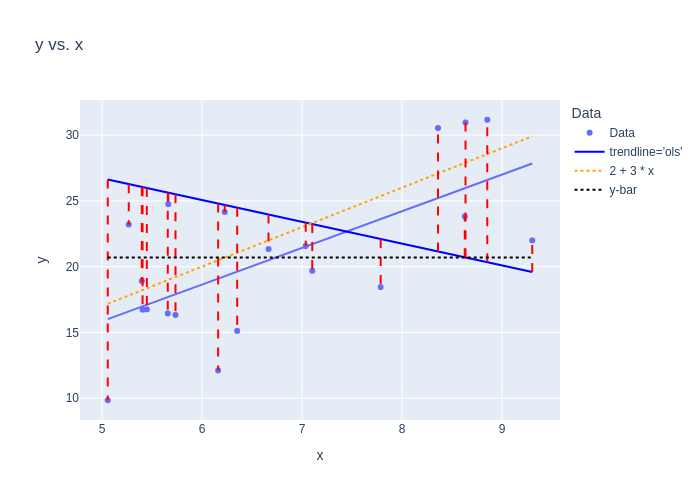

In [59]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The line that is chosen for the fitted model based on the observed data is the one that minimizes the sum of the squared residules. A residule is the difference between the observed and predicted outcomes. It must squared to ensure the values are positive and do not cancel eachother out. Therefore the line that is chosen for the fitted model would be treandline='ols' line.

QUESTION 6

1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum() can be interpreted as the proportion of variation because it uses the model fitted_model.fittedvalues to inidicate how well the model explains the variability in the data. Therefore fitted_model.rsquared can be interpreted as a measure of the accuracy of the model. In the context of Simple Linear Regression models the two np.corrcoef(...)[0,1]**2 expressions capture the squared correlation between Y and Y^, and also, Y and x.


Chatbot summary: 
We discussed the interpretation of R^2 as the proportion of variance in Y explained by a model. We then reviewed three ways to calculate or interpret R^2directly from fitted_model.rsquared, using the squared correlation between Y and the model's fitted values, and finding the squared correlation between Y and a single predictor x.

Chatlog history: https://chatgpt.com/c/672d9777-a714-800b-9946-67b264d369cd

QUESTION 7

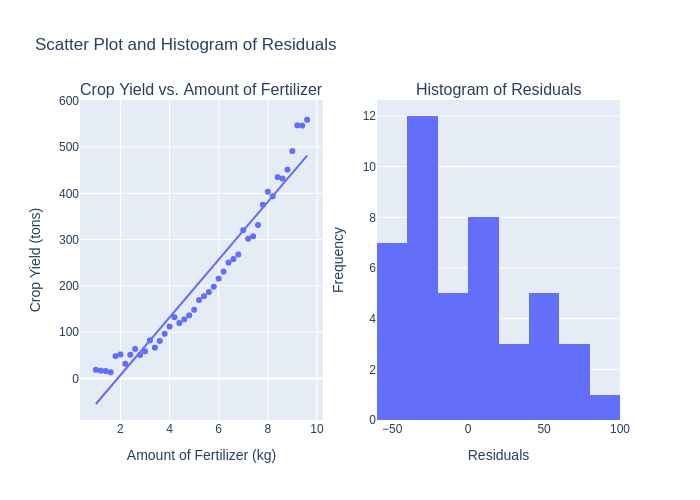

In [62]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The assumptions of the simple linear regression model are that:
1. the errors are normally distributed
2. the errors are homoscedastic
3. the linear form is "true"
4. the errors are statistically independent

This data fails all four as the linear form of the data is not "true" as seen in the shape of our scatter plot, the errors are not homoscedastic as the variablitity is increassing, and the errors are not normally distibuted nor independant.

Chatbot summary: 
We reviewed code for performing linear regression on crop yield and fertilizer data, examining how it violates linear regression assumptions—particularly regarding linearity, homoscedasticity, and normality of residuals. Suggestions included exploring nonlinear models or transformations to better capture the relationship.

Chatlog history: https://chatgpt.com/c/672d9862-7284-800b-9678-638a4eb5d8f2

WEEK OF NOVEMBER 4

QUESTION 8

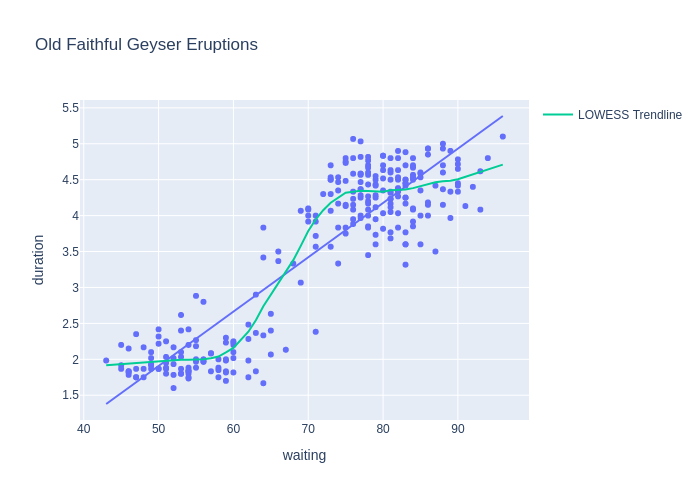

In [2]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Null hypothesis (H0): There is no linear association (on average) in terms of the relevant parameter of the Simple Linear Regression model.
Alternative hypothesis (HA): There is a linear association (on average) in terms of the relevant parameter of the Simple Linear Regression model.


and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:57:05   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.001 >= p, therefore we will reject the null hypothesis H0

QUESTION 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


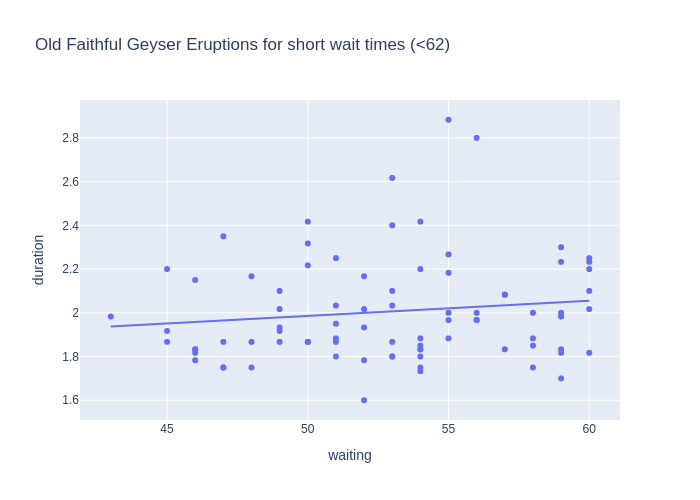

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Null hypothesis (H0): There is no relationship between duration and wait time in the same manner as in the full data set.
Alternative hypothesis (HA): There is a relationship between duration and wait time in the same manner as in the full data set.

p > 0.1 therefore we fail to reject the null hypothesis.


We infer that in the context of short wait times which are less than short_wait_limit values of 62, 64, 66, there is no relationship between duration and wait time in the same manner as in the full data set.

QUESTION 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


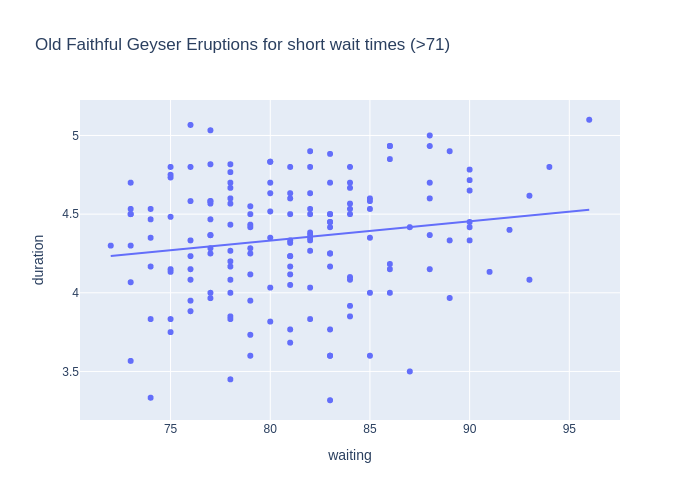

In [9]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

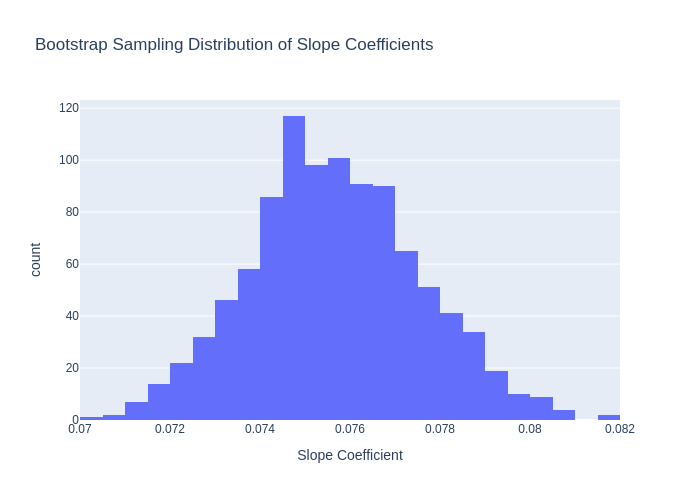

In [11]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters
num_bootstrap_samples = 1000  # Number of bootstrap samples
slope_coefficients = []  # List to store slope coefficients

# Generate bootstrap samples and fit the model for each sample
for i in range(num_bootstrap_samples):
    # Create a bootstrap sample
    bootstrap_sample = old_faithful.sample(frac=1, replace=True)
    
    # Fit a Simple Linear Regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the slope coefficient
    slope_coefficients.append(model.params['waiting'])

# Convert slope coefficients to a DataFrame for easier plotting
slope_df = pd.DataFrame(slope_coefficients, columns=['slope'])

# Visualize the distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Bootstrap Sampling Distribution of Slope Coefficients",
                   labels={'slope': 'Slope Coefficient'})
fig.show(renderer="png")  # Use `fig.show(renderer="png")` for GitHub and MarkUs submissions


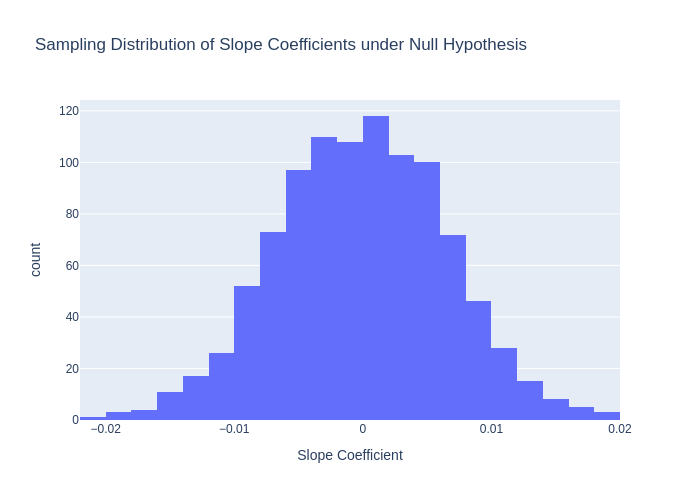

In [12]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters
n = 160  # Sample size
num_simulations = 1000  # Number of simulated samples
null_slope_coefficients = []  # Store slopes under null hypothesis

# Assume a null hypothesis where there is no association (slope = 0)
# Use the observed data to set the mean and noise level
mean_duration = old_faithful['duration'].mean()
std_residuals = old_faithful['duration'].std()

# Run simulations
for _ in range(num_simulations):
    # Simulate y-values under the null hypothesis (mean response only)
    simulated_y = mean_duration + np.random.normal(0, std_residuals, size=n)
    
    # Create a DataFrame for the simulated dataset
    simulated_data = pd.DataFrame({
        'waiting': old_faithful['waiting'].sample(n=n, replace=True).values,
        'duration': simulated_y
    })
    
    # Fit a Simple Linear Regression model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient
    null_slope_coefficients.append(model.params['waiting'])

# Convert to DataFrame for visualization
null_slope_df = pd.DataFrame(null_slope_coefficients, columns=['slope'])

# Visualize the sampling distribution under the null hypothesis
fig = px.histogram(null_slope_df, x='slope', nbins=30,
                   title="Sampling Distribution of Slope Coefficients under Null Hypothesis",
                   labels={'slope': 'Slope Coefficient'})
fig.show(renderer="png")  # Use `fig.show(renderer="png")` for GitHub and MarkUs submissions


In [13]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Given dataset and filtering
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
filtered_data = old_faithful[long_wait]

# Parameters for bootstrap and simulation
num_bootstrap_samples = 1000
num_simulations = 1000
slope_coefficients = []

# Bootstrap: Collect slope coefficients
for _ in range(num_bootstrap_samples):
    bootstrap_sample = filtered_data.sample(frac=1, replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope_coefficients.append(model.params['waiting'])

# Calculate 95% CI for bootstrap slopes
ci_lower, ci_upper = np.percentile(slope_coefficients, [2.5, 97.5])
contains_zero = ci_lower <= 0 <= ci_upper

# Null hypothesis slope sampling
mean_duration = filtered_data['duration'].mean()
std_residuals = filtered_data['duration'].std()
null_slope_coefficients = []

for _ in range(num_simulations):
    simulated_y = mean_duration + np.random.normal(0, std_residuals, size=len(filtered_data))
    simulated_data = pd.DataFrame({
        'waiting': filtered_data['waiting'].values,
        'duration': simulated_y
    })
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slope_coefficients.append(model.params['waiting'])

# Calculate observed slope and p-value
observed_slope = smf.ols('duration ~ waiting', data=filtered_data).fit().params['waiting']
simulated_p_value = (np.abs(null_slope_coefficients) >= np.abs(observed_slope)).mean()

# Get the p-value from the original model
model = smf.ols('duration ~ waiting', data=filtered_data).fit()
original_p_value = model.pvalues['waiting']

# Output results
print(f"95% Bootstrap Confidence Interval for Slope: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Does the CI contain zero? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value: {simulated_p_value:.4f}")
print(f"Original p-value from smf.ols: {original_p_value:.4f}")


95% Bootstrap Confidence Interval for Slope: [0.0008, 0.0227]
Does the CI contain zero? No
Simulated p-value: 0.0410
Original p-value from smf.ols: 0.0381


QUESTION 11

The big picture differences between this model specification and the previously considered model specifications:
1. smf.ols('duration ~ waiting', data=old_faithful): This code fits a linear regression model to the entire data.
2. smf.ols('duration ~ waiting', data=old_faithful[short_wait]): This code fits a linear regression model to the entire data where the waiting time is short (<68).
3. smf.ols('duration ~ waiting', data=old_faithful[long_wait]): This code fits a linear regression model to the entire data where the waiting time is long (>=68).

This differs from the other model as it uses the contrast of the data rather than beta1 (the slope).


Null hypothesis (H0): There is no relationship between duration and wait time in the same manner as in the full data set.
Alternative hypothesis (HA): There is a relationship between duration and wait time in the same manner as in the full data set.

p > 0.1 therefore we fail to reject the null hypothesis.

We infer that in the context of short wait times which are less than short_wait_limit values of 62, 64, 66, there is no relationship between duration and wait time in the same manner as in the full data set.

QUESTION 12

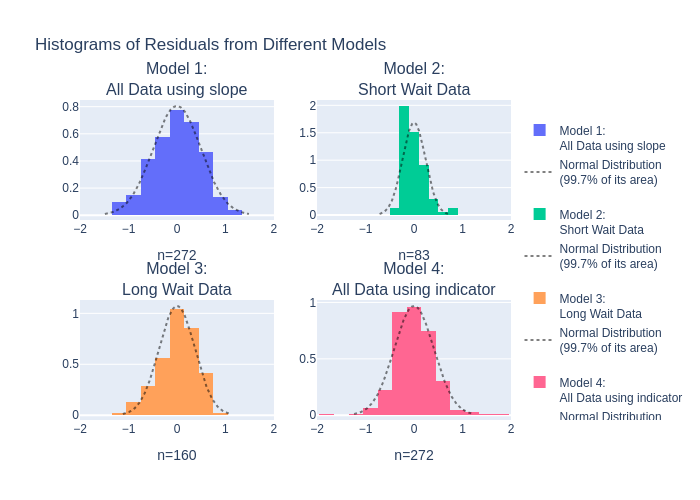

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The histograms that suggest the plausibility of the assumption that the distribution of error terms being normal are the ones that most resemble a normal distibution. This is due to the assumption that the errors within a linear regression model are normally distributed. Therefore of the 4 histograms, model 1 suggest this normal distribution of the error terms.

QUESTION 13

Observed Difference in Means: -1.6704168230143845
P-value: 0.0
Reject the null hypothesis: There is a significant difference between short and long wait times.


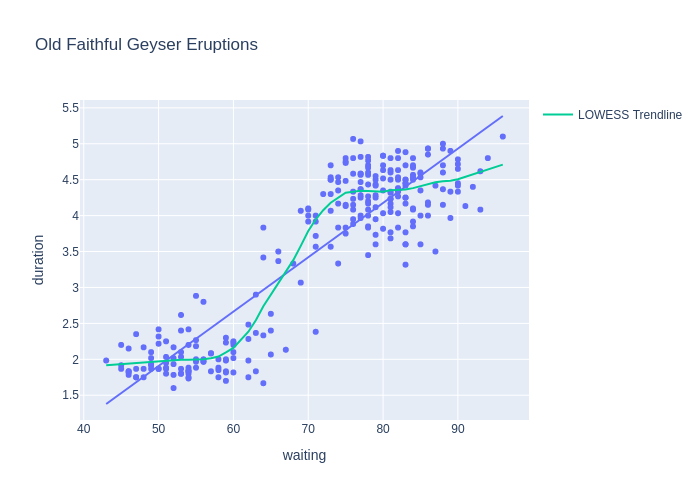

In [21]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the short and long waiting times (based on a threshold)
short_wait_times = old_faithful[old_faithful['waiting'] <= 50]['duration']
long_wait_times = old_faithful[old_faithful['waiting'] > 50]['duration']

# Calculate the observed difference in means
obs_diff = np.mean(short_wait_times) - np.mean(long_wait_times)

# Combine the data
combined_data = np.concatenate([short_wait_times, long_wait_times])

# Perform the permutation test
num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    # Shuffle combined data and split it back into two groups
    np.random.shuffle(combined_data)
    perm_short = combined_data[:len(short_wait_times)]
    perm_long = combined_data[len(short_wait_times):]
    
    # Calculate the difference in means for the permutation
    perm_diff = np.mean(perm_short) - np.mean(perm_long)
    permuted_diffs.append(perm_diff)

# Calculate the p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(obs_diff))

# Output the results
print(f"Observed Difference in Means: {obs_diff}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between short and long wait times.")
else:
    print("Fail to reject the null hypothesis: No significant difference between short and long wait times.")

# Plot the scatter plot with linear and LOWESS trendlines (as in your previous code)
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")


In [22]:
import numpy as np
import seaborn as sns
import pandas as pd

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the short and long waiting times (based on a threshold)
short_wait_times = old_faithful[old_faithful['waiting'] <= 50]['duration']
long_wait_times = old_faithful[old_faithful['waiting'] > 50]['duration']

# Number of bootstrap iterations
num_bootstrap = 10000

# Store bootstrap mean differences
bootstrap_mean_differences = []

# Perform bootstrap sampling
for _ in range(num_bootstrap):
    # Resample (with replacement) from each group
    boot_short = np.random.choice(short_wait_times, size=len(short_wait_times), replace=True)
    boot_long = np.random.choice(long_wait_times, size=len(long_wait_times), replace=True)
    
    # Calculate the mean difference between the two bootstrap samples
    boot_diff = np.mean(boot_short) - np.mean(boot_long)
    bootstrap_mean_differences.append(boot_diff)

# Calculate the 95% bootstrap confidence interval using np.quantile
ci_lower, ci_upper = np.quantile(bootstrap_mean_differences, [0.025, 0.975])

# Output the results
print(f"Bootstrap 95% Confidence Interval for the Difference in Means:")
print(f"Lower Bound: {ci_lower}")
print(f"Upper Bound: {ci_upper}")


Bootstrap 95% Confidence Interval for the Difference in Means:
Lower Bound: -1.8243443167604754
Upper Bound: -1.5118716463414634


QUESTION 14

Yes, I have reviewed the course wiki-textbook and interacted with a ChatBot to help me understand all the material in the tutorial and lecture.